# Homework #1: AB-testing<br>and the Multi-Armed Bayesian Bandit

### You have three choices... choose wisely, my friends...


|Option|The "Red" one|The "Blue" one|The "Other" one|
|-|-|-|-|
|Unknown Probability of Success|$\theta_A$ | $\theta_B$ | $\theta_C$ |

$$p(\theta_j|x_j,n_j) \propto \theta^{x_j+\alpha_j-1}(1-\theta_j)^{n-x+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$

- Try one out, and collect that data update...
    - What's the data?
    - What's the update for the posterior in question?
- Which one of the three choices will you try out? How will you choose? 


- Hints: <u>You can use *simulation* to find out the *relative belief* (i.e., probability) that each of the choices is the best.</u> Posterior distributions characterize your beliefs about the parameters $\theta_A, \theta_B$ and $\theta_C$. What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? If you know the chances that A, B, and C are the best choice, how could you balance ***exploration versus exploitation*** when choosing which of the possible options to collect the next data point on next?



In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

Let's consider two experiment:  

 - First: We randomly generate three value from Beta(1,1) distribution as our prior $\theta_{A}$,$\theta_{B}$ and $\theta_{C}$, then simulate bernouli trials from those generated priors in order to update parameters, trials, Successes,$\alpha$ and $\beta$. 
 - Second: We set three prior all equal to 0.3, then repeat the process above.


{'PriorA': 0.6542860286950997, 'PriorB': 0.4864662669877688, 'PriorC': 0.878554301934499}


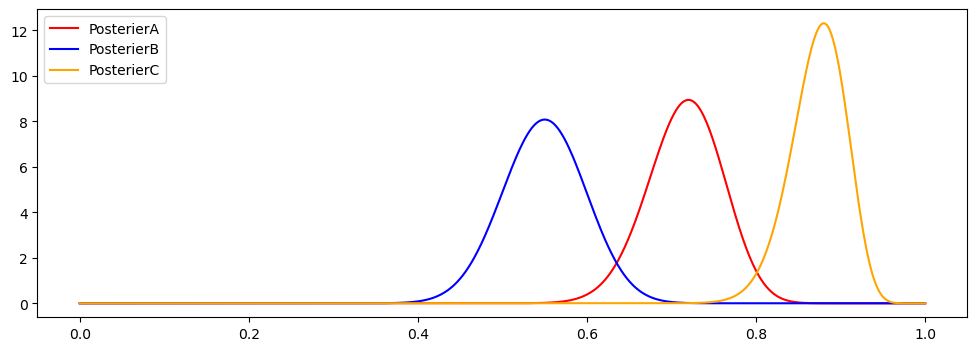

In [175]:
#First experiment

#Set seed and the parameters
parameter_domain = np.linspace(0,1,1001)
np.random.seed(369)
#Initiate parameters
alpha_A, beta_A,TrialA,SuccessA = 1,1,0,0
alpha_B, beta_B,TrialB,SuccessB = 1,1,0,0
alpha_C, beta_C,TrialC,SuccessC = 1,1,0,0

#Random sample priors from beta(1,1)
Prior_A = np.random.beta(alpha_A,beta_A)
Prior_B = np.random.beta(alpha_B,beta_B)
Prior_C = np.random.beta(alpha_C,beta_C)
Priors = {
    'PriorA':Prior_A,
    'PriorB':Prior_B,
    'PriorC':Prior_C,
    }
print(Priors)

#Running simulations to update Trials and Successes, using the priors we sample from beta(1,1)

#A
for i  in range(100):
    if stats.bernoulli(p=Prior_A).rvs(size=1) == 1:
        SuccessA+=1
    TrialA += 1

alpha_A += SuccessA+alpha_A-1;
beta_A += TrialA-SuccessA+beta_A-1;

#B
for i  in range(100):
    if stats.bernoulli(p=Prior_B).rvs(size=1) == 1:
        SuccessB+=1
    TrialB += 1

alpha_B += SuccessB+alpha_B-1;
beta_B += TrialB-SuccessB+beta_B-1;

#C
for i  in range(100):
    if stats.bernoulli(p=Prior_C).rvs(size=1) == 1:
        SuccessC+=1
    TrialC += 1

alpha_C += SuccessC+alpha_C-1;
beta_C += TrialC-SuccessC+beta_C-1;


#Generate Prosteriers
PosterierA = stats.beta(a=alpha_A,b=beta_A).pdf(parameter_domain)
PosterierB = stats.beta(a=alpha_B,b=beta_B).pdf(parameter_domain)
PosterierC = stats.beta(a=alpha_C,b=beta_C).pdf(parameter_domain)

#Plot Three Posteriers
plt.figure(figsize=(12,4));parameter_domain = np.linspace(0,1,1001)
plt.plot(parameter_domain, PosterierA,color = 'Red',label="PosterierA"); 
plt.plot(parameter_domain, PosterierB,color = 'Blue',label="PosterierB"); 
plt.plot(parameter_domain, PosterierC,color = 'Orange',label="PosterierC");  plt.legend(); 

- We can see that the one with higher prior will likely win the run. Back to the question we encountered, we would choose $\theta_{C}$ (Prior C) at this position.

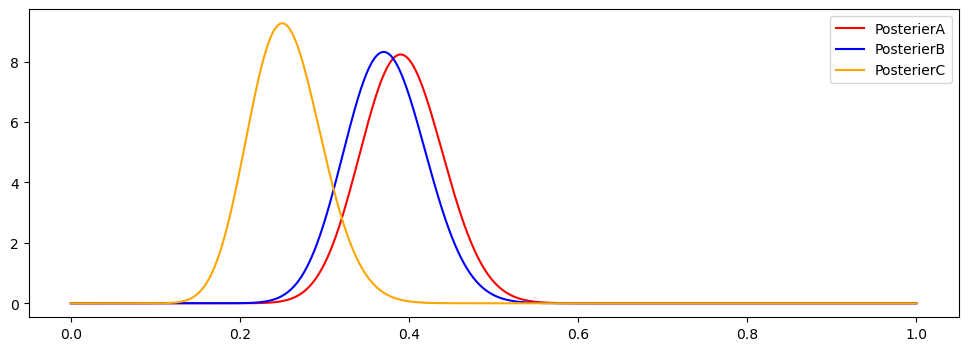

In [186]:
#Second Experiment

#Set seed and the parameters
parameter_domain = np.linspace(0,1,1001)
np.random.seed(963)

#Initiate parameters
alpha_A, beta_A,TrialA,SuccessA = 1,1,0,0
alpha_B, beta_B,TrialB,SuccessB = 1,1,0,0
alpha_C, beta_C,TrialC,SuccessC = 1,1,0,0


#A
for i  in range(100):
    if stats.bernoulli(p=0.3).rvs(size=1) == 1:
        SuccessA+=1
    TrialA += 1

alpha_A += SuccessA+alpha_A-1;
beta_A += TrialA-SuccessA+beta_A-1;

#B
for i  in range(100):
    if stats.bernoulli(p=0.3).rvs(size=1) == 1:
        SuccessB+=1
    TrialB += 1

alpha_B += SuccessB+alpha_B-1;
beta_B += TrialB-SuccessB+beta_B-1;

#C
for i  in range(100):
    if stats.bernoulli(p=0.3).rvs(size=1) == 1:
        SuccessC+=1
    TrialC += 1

alpha_C += SuccessC+alpha_C-1;
beta_C += TrialC-SuccessC+beta_C-1;

#Generate Prosteriers
PosterierA = stats.beta(a=alpha_A,b=beta_A).pdf(parameter_domain)
PosterierB = stats.beta(a=alpha_B,b=beta_B).pdf(parameter_domain)
PosterierC = stats.beta(a=alpha_C,b=beta_C).pdf(parameter_domain)

#Plot Three Posteriers
plt.figure(figsize=(12,4));parameter_domain = np.linspace(0,1,1001)
plt.plot(parameter_domain, PosterierA,color = 'Red',label="PosterierA"); 
plt.plot(parameter_domain, PosterierB,color = 'Blue',label="PosterierB"); 
plt.plot(parameter_domain, PosterierC,color = 'Orange',label="PosterierC");  plt.legend(); 

- We would choose $\theta_{A}$ (PriorA) at this position.